### Using Cython to improve code performance

[Cython](https://cython.org/) is a Python-to-C compiler that allows you to write Python functions in C, using a Python-like syntax. The resulting functions can be used in Python just the way normal Python functions are used, and can provide a big performance boost, especially for numeric operations.

In [1]:
%load_ext Cython

Define a simple iterative function to compute Fibonacci numbers, and time its execution

In [2]:
def python_fib(n):
    a, b = 1, 1
    for _ in range(n):
        a, b = a + b, a
    return a

%timeit python_fib(75)

18.6 µs ± 502 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Now do the same thing in Cython, augmenting variables with type information

In [3]:
%%cython

def cython_fib(int n):
    cdef long a, b
    cdef int i
    a, b = 1, 1
    for i in range(n):
        a, b = a + b, a
    return a 

In [4]:
%timeit cython_fib(75)

328 ns ± 4.27 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


You can call Cython functions from Python (which is the whole point)

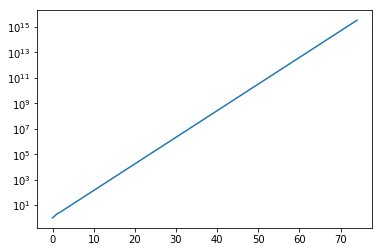

In [6]:
%matplotlib inline
import pandas as pd

pd.Series([cython_fib(n) for n in range(75)]).plot(logy=True);

C's type system is lacking some Python features, so some operations will not work. For example, Python integers can be arbitrarily long:

In [7]:
python_fib(2000)

11060398592968111525752122151512062889635260869616205663417833505112391038778184722178657918592255313815049814308433051085878386904358122707211926650904838731358970622312655676817043129750358765817784900185247579396906521619480982447822746241147103233784674509700828415972370518173238786616285000193968035458167783632091600439101395042217802789913558621814093174481297371917655853533113087912842725598622533579109639751

Whereas C long integers have a limited range and operations outside of that range overflow:

In [8]:
cython_fib(2000)

-7637997859248462265

However, the performance gain is usually worth it for having to cope with some limitations.